In [1]:
! pip uninstall keras-ocr
! pip install keras-ocr==0.8.8
! pip list | grep keras-ocr
! pip install --upgrade matplotlib

Found existing installation: keras-ocr 0.8.8
Uninstalling keras-ocr-0.8.8:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras_ocr-0.8.8.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras_ocr/*
Proceed (y/n)? y
  Successfully uninstalled keras-ocr-0.8.8
  Using cached keras_ocr-0.8.8-py3-none-any.whl (41 kB)
keras-ocr                     0.8.8


In [2]:
import matplotlib.pyplot as plt
import keras_ocr
import os 

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [4]:
img_paths = '/content/drive/MyDrive/images/ocr-python'
img_file = ['brooklyn99.jpg',
            'demonslayer.jpg',
            'dynasty.jpg',
            'euphoria.jpg',
            'ginnyandgeorgia.jpg',
            'himym.jpg',
            'howtoselldrugsonline.jpg',
            'lalaland.jpg',
            'meangirls.jpg',
            'nowyouseeme.jpg',
            'orient-express.jpg',
            'riverdale.jpg',
            'spiderman.jpg',
            'strangerthings.jpg',
            'theboldtype.jpg',
            'thedeathofnileriver.jpg',
            'yourname.jpg']

# images= [keras_ocr.tools.read(url) for url in image_urls]
image_path = []
for i in range(len(img_file)):
  image_path.append(os.path.join(img_paths,img_file[i]))

images = [keras_ocr.tools.read(image) for image in image_path ]
prediction_groups = [pipeline.recognize([image]) for image in image_path]

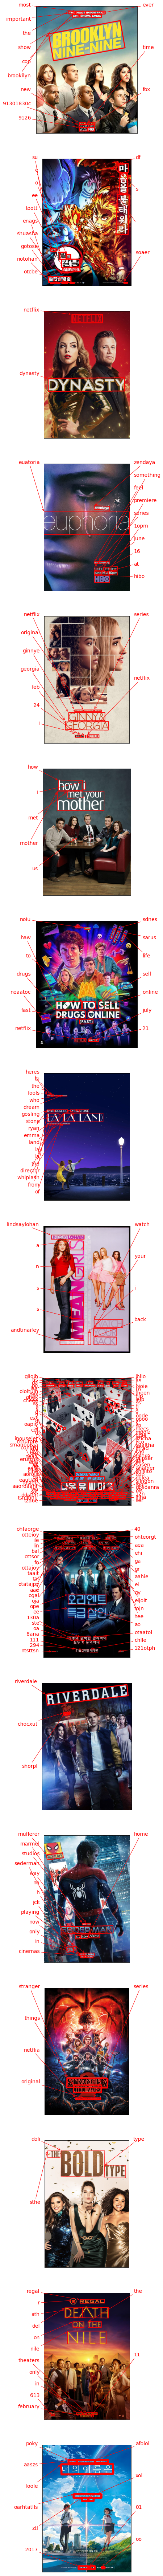

In [5]:
fig, axs = plt.subplots(nrows=len(images),figsize=(130,130))
for idx, ax in enumerate(axs): 
  keras_ocr.tools.drawAnnotations(image=images[idx],predictions=prediction_groups[idx][0],ax=ax)

In [6]:
! sudo apt install tesseract-ocr
! sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [7]:
! pip install pytesseract
! pip list | grep pytesseract

pytesseract                   0.3.9


In [8]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list




In [9]:
work_dir = '/content/drive/MyDrive/images/ocr-python'
image_file_path = []
for i in range(len(img_file)):
  image_file_path.append(os.path.join(work_dir,img_file[i]))

# img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
  try :
    cropped_image_path_list = crop_word_regions(image_file_path[i], work_dir)
  except :
    print('system error : tile cannot extend outside image')
    

/content/drive/MyDrive/images/ocr-python/0000.png
/content/drive/MyDrive/images/ocr-python/0001.png
/content/drive/MyDrive/images/ocr-python/0002.png
/content/drive/MyDrive/images/ocr-python/0003.png
/content/drive/MyDrive/images/ocr-python/0004.png
/content/drive/MyDrive/images/ocr-python/0005.png
/content/drive/MyDrive/images/ocr-python/0006.png
/content/drive/MyDrive/images/ocr-python/0007.png
/content/drive/MyDrive/images/ocr-python/0008.png
/content/drive/MyDrive/images/ocr-python/0009.png
/content/drive/MyDrive/images/ocr-python/0010.png
system error : tile cannot extend outside image
/content/drive/MyDrive/images/ocr-python/0000.png
system error : tile cannot extend outside image
/content/drive/MyDrive/images/ocr-python/0000.png
/content/drive/MyDrive/images/ocr-python/0000.png
/content/drive/MyDrive/images/ocr-python/0001.png
/content/drive/MyDrive/images/ocr-python/0002.png
/content/drive/MyDrive/images/ocr-python/0003.png
/content/drive/MyDrive/images/ocr-python/0004.png
/con

In [10]:
! sudo apt install tesseract-ocr-kor


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [16]:
! sudo apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libnvidia-common-470
0 upgraded, 0 newly installed, 1 to remove and 39 not upgraded.
After this operation, 35.8 kB disk space will be freed.
(Reading database ... 155482 files and directories currently installed.)
Removing libnvidia-common-470 (470.103.01-0ubuntu1) ...


In [23]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [24]:
recognize_images(cropped_image_path_list)


Done


In [25]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [29]:
import numpy as np
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 3, replace=False)
#random_idx 3개 뽑기
cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

ValueError: ignored

In [28]:
recognize_images(cropped_image_pahts)




Done
